In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score 

In [22]:
X,y = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_informative=2,random_state=1,n_clusters_per_class=1)

In [23]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [24]:
logistic_regression = LogisticRegression()

In [25]:
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred = logistic_regression.predict(X_test)

In [27]:
y_pred   

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1])

In [28]:
accuracy = accuracy_score(y_test,y_pred)

In [32]:
print(f"accuracy:{accuracy:.2f}")

accuracy:0.91


In [34]:
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1

In [35]:
x_min,x_max

(-2.425033453528771, 4.430695363590262)

In [38]:
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

In [40]:
Z = logistic_regression.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

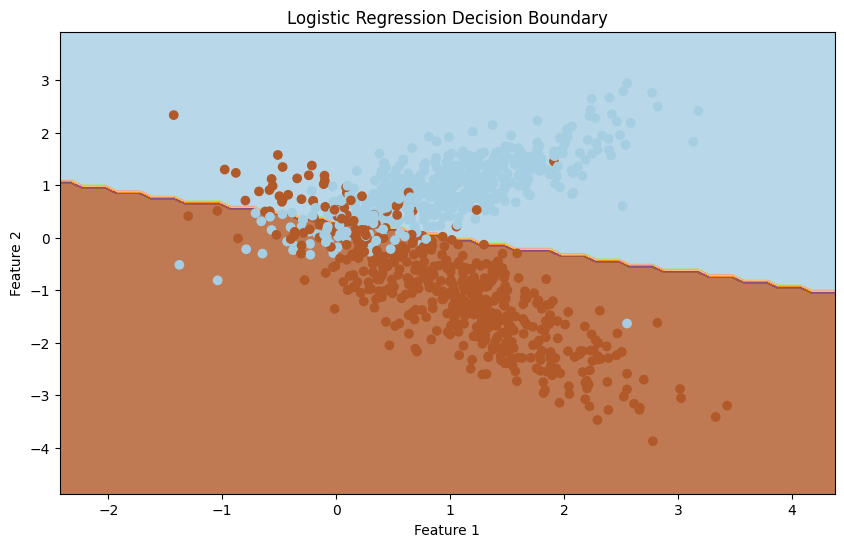

Confusion Matrix:
[[ 82   9]
 [  9 100]]


In [44]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.show()

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

In [47]:
conf_matrix 


array([[ 82,   9],
       [  9, 100]])

In [67]:
TP = conf_matrix[1,1] # true positive
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives


In [68]:
precision = TP/(TP+FP)

In [69]:
recall = TP/(TP+FN)

In [70]:
2*(recall * precision) / (recall + precision)

0.9174311926605505

In [71]:
f1 = 2 *(recall * precision) / (recall + precision)

In [73]:
print(f"Precision:{precision:.9f}")
print(f"recall:{recall:.9f}")
print(f"F-1 Score:{f1:.9f}")


Precision:0.917431193
recall:0.917431193
F-1 Score:0.917431193
